In [4]:
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1234)

The function below allows you to plot the phase plane of Eq. 1 for different value $\alpha$

In [5]:
def plot_phase_plane(alpha,b1=0.5,b2=0.5,w_ee=3.0):
    """Plots the phase plane of Eq. 1
    Args:
        alpha: inhibition parameter
        b1: bias for population 1
        b2: bias for population 2
        w_ee: self-excitation parameter
    """
    A = np.array([[-1, 0],
                    [0, -1]])
    # Quadrant I) 1<=h1 and 1<=h2
    B_1 = np.array([w_ee-2*alpha, w_ee-2*alpha])
    # Quadrant II)
    B_2 = np.array([-alpha,w_ee -alpha])
    # Quadrant III) h1<=0 and h2<=0
    B_3 = np.array([0,0])
    # Quadrant IV) 1<=h1 and h2<=0
    B_4 = np.array([w_ee-alpha, -alpha])
    
    
    # Note that case 2 and 3 are symmetric.
    b = np.array([b1, b2])
    
    # Calculate the fixed-points
    h_fp_1 = np.linalg.solve(A,-b-B_1)
    h_fp_2 = np.linalg.solve(A,-b-B_2)
    h_fp_3 = np.linalg.solve(A,-b-B_3)
    h_fp_4 = np.linalg.solve(A,-b-B_4)
    
    ## Plot the (virtual) fixed-points
    plt.plot(h_fp_1[0],h_fp_1[1],'ro')
    plt.plot(h_fp_2[0],h_fp_2[1],'mo')
    plt.plot(h_fp_3[0],h_fp_3[1],'ko')
    plt.plot(h_fp_4[0],h_fp_4[1],'bo')
    
    ## Plot some labels
    plt.axhline(y=0, color="black")
    plt.axhline(y=1, color="black")
    plt.axvline(x=0, color="black")
    plt.axvline(x=1, color="black")
    plt.axis('equal')
    plt.xlabel(r"$h_1$")
    plt.ylabel(r"$h_2$")
    #XLI = plt.xlim()
    #YLI = plt.ylim()
    hmax = 2.5
    plt.xlim(-hmax,1+hmax)
    plt.xlim(-hmax,1+hmax)
    plt.text(4,3,'I')
    plt.text(-4,3,'II')
    plt.text(-4,-2,'III')
    plt.text(4,-2,'IV')
    
    ## Plot the vector field
    mar = 0.0
    # Quadrant 1
    xx_1 = np.linspace(1+mar,1+hmax,num=8)
    yy_1 = np.linspace(1+mar,1+hmax,num=8)
    (XX_1, YY_1) = np.meshgrid(xx_1, yy_1)
    
    dX_1 = A[0][0]*XX_1 + A[0][1]*YY_1 + b[0] + B_1[0]
    dY_1 = A[1][0]*XX_1 + A[1][1]*YY_1 + b[1] + B_1[1]
    
    # Quadrant II
    xx_2 = np.linspace(-hmax,-mar,num=8)
    yy_2 = np.linspace(1+mar,1+hmax,num=8)
    (XX_2, YY_2) = np.meshgrid(xx_2, yy_2)
    
    dX_2 = A[0][0]*XX_2 + A[0][1]*YY_2 + b[0] + B_2[0]
    dY_2 = A[1][0]*XX_2 + A[1][1]*YY_2 + b[1] + B_2[1]
    
    # Quadrant III
    xx_3 = np.linspace(-hmax,-mar,num=8)
    yy_3 = np.linspace(-hmax,-mar,num=8)
    (XX_3, YY_3) = np.meshgrid(xx_3, yy_3)
    
    dX_3 = A[0][0]*XX_3 + A[0][1]*YY_3 + b[0] + B_3[0]
    dY_3 = A[1][0]*XX_3 + A[1][1]*YY_3 + b[1] + B_3[1]

    # Quadrant IV
    xx_4 = np.linspace(1+mar,1+hmax,num=8)
    yy_4 = np.linspace(-hmax,-mar,num=8)
    (XX_4, YY_4) = np.meshgrid(xx_4, yy_4)
    
    dX_4 = A[0][0]*XX_4 + A[0][1]*YY_4 + b[0] + B_4[0]
    dY_4 = A[1][0]*XX_4 + A[1][1]*YY_4 + b[1] + B_4[1]    

    # Plot the vector field in the four quadrants
    plt.quiver(XX_1, YY_1, dX_1, dY_1, color='r', pivot='mid', width=0.002)
    plt.quiver(XX_2, YY_2, dX_2, dY_2, color='m', pivot='mid', width=0.002)
    plt.quiver(XX_3, YY_3, dX_3, dY_3, color='k', pivot='mid', width=0.002)
    plt.quiver(XX_4, YY_4, dX_4, dY_4, color='b', pivot='mid', width=0.002)


Example for $\alpha=0$:

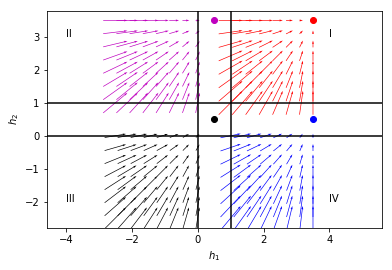

In [7]:
alpha =0
plot_phase_plane(alpha)